# Text Classification with 20 Newsgroups Dataset using RNN and LSTM

This notebook demonstrates how to perform text classification using both RNN and LSTM models on the 20 Newsgroups dataset.

### Step 1: Install TensorFlow

In [1]:
!pip install tensorflow

### Step 2: Import Libraries

In [2]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Step 3: Load and Preprocess the Dataset

In [3]:
# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

# Preprocess the data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(newsgroups.data)
sequences = tokenizer.texts_to_sequences(newsgroups.data)
X = pad_sequences(sequences, maxlen=200)
y = to_categorical(newsgroups.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Build and Compile the RNN Model

In [4]:
# Build the RNN model
rnn_model = Sequential([
    tf.keras.layers.Input(shape=(200,)),  # Input layer max_length = 200
    tf.keras.layers.Embedding(10000, 64), # Embedding layer voacb_size = 10000
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(20, activation='sigmoid')
])

rnn_model.summary()

# Compile the model
rnn_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 200, 128)            │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 752,724 (2.87 MB)

 Trainable params: 752,724 (2.87 MB)

 Non-trainable params: 0 (0.00 B)

### Step 5: Build and Compile the LSTM Model

In [5]:
# Build the LSTM model
lstm_model = Sequential([
    tf.keras.layers.Input(shape=(200,)),
    tf.keras.layers.Embedding(5000, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])

lstm_model.summary()

# Compile the model
lstm_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 200, 64)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 200, 128)            │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 430,004 (1.64 MB)

 Trainable params: 430,004 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

### Step 6: Train the RNN Model

In [6]:
# Train the RNN model
history_rnn = rnn_model.fit(
    X_train, y_train.astype('float32'),  # Cast y_train to float32
    validation_data=(X_test, y_test.astype('float32')),  # Cast y_test to float32
    epochs=5,
    batch_size=32
)

Epoch 1/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.0465 - loss: 0.2695 - val_accuracy: 0.0676 - val_loss: 0.1966
Epoch 2/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.0897 - loss: 0.1945 - val_accuracy: 0.1716 - val_loss: 0.1837
Epoch 3/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.2346 - loss: 0.1727 - val_accuracy: 0.3024 - val_loss: 0.1608
Epoch 4/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.3789 - loss: 0.1441 - val_accuracy: 0.3873 - val_loss: 0.1430
Epoch 5/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.4681 - loss: 0.1237 - val_accuracy: 0.4615 - val_loss: 0.1250


### Step 7: Train the LSTM Model

In [8]:
# Train the LSTM model
history_lstm = lstm_model.fit(
    X_train, y_train.astype('float32'),  # Cast y_train to float32
    validation_data=(X_test, y_test.astype('float32')),  # Cast y_test to float32
    epochs=5,
    batch_size=32
)


Epoch 1/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.1014 - loss: 2.8146 - val_accuracy: 0.1615 - val_loss: 2.5832
Epoch 2/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.2603 - loss: 2.1279 - val_accuracy: 0.3647 - val_loss: 1.8373
Epoch 3/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.4386 - loss: 1.6231 - val_accuracy: 0.4355 - val_loss: 1.7174
Epoch 4/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.4572 - loss: 1.5871 - val_accuracy: 0.4523 - val_loss: 1.6269
Epoch 5/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.5552 - loss: 1.3198 - val_accuracy: 0.5435 - val_loss: 1.4172


### Step 8: Evaluate the Models

In [9]:
# Evaluate the models
lstm_eval = lstm_model.evaluate(X_test, y_test)
rnn_eval = rnn_model.evaluate(X_test, y_test)

118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5380 - loss: 1.4574
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4558 - loss: 0.1270


### Step 9: Plot the Training and Validation Accuracy/Loss

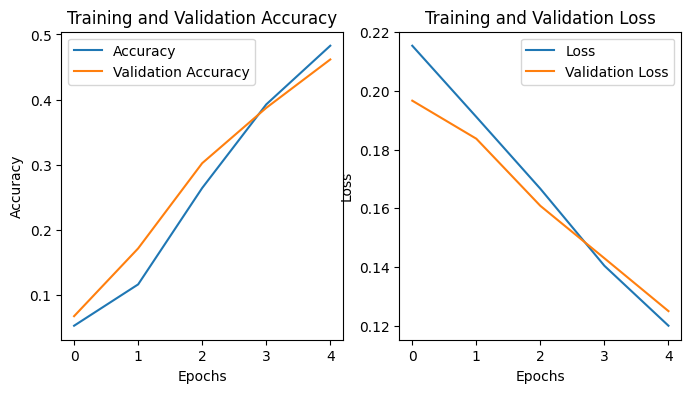

In [10]:
# Training history
history_dict = history_rnn.history
# Seperating validation and training accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Seperating validation and training loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plotting
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()

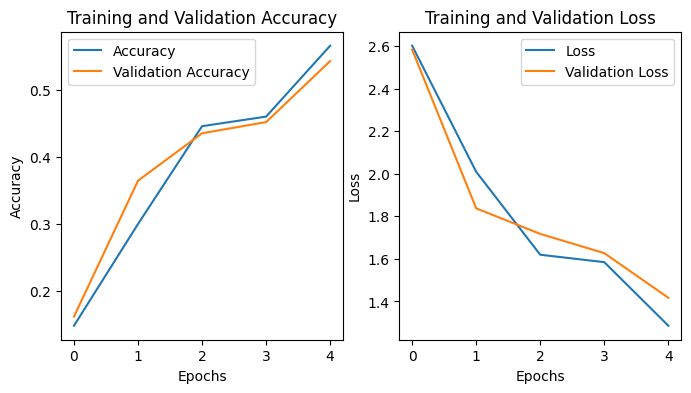

In [11]:
# Training history
history_dict = history_lstm.history
# Seperating validation and training accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Seperating validation and training loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plotting
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()

### Step 10: Classify a Sample Text

In [12]:
# Sample text to predict
sample_text = (
    '''The movie was so good and the animation are so dope.
    I would recommend my friends to watch it.'''
)

# Tokenize and pad the sample text
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000)
tokenizer.fit_on_texts([sample_text])  # Fitting on the sample text to tokenize
sample_seq = tokenizer.texts_to_sequences([sample_text])
sample_padded = pad_sequences(sample_seq, maxlen=200, padding='post')

# Make prediction
predictions = rnn_model.predict(sample_padded)
print(*predictions[0])

# Print the label based on the prediction
if predictions[0][0] > 0:
    print('The review is positive')
else:
    print('The review is negative')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
0.016357137 0.0050509297 0.00018795415 0.00014799206 0.0029571208 6.683216e-05 0.0057883193 0.0020742242 0.00042764263 0.0008376948 0.03101113 0.014219036 0.0013220827 0.2378649 0.00026515572 0.00050969794 0.0070357933 0.0015969512 0.05757356 0.0051126205
The review is positive


In [13]:
# Sample text to predict
sample_text = (
    '''The movie was so good and the animation are so dope.
    I would recommend my friends to watch it.'''
)

# Tokenize and pad the sample text
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000)
tokenizer.fit_on_texts([sample_text])  # Fitting on the sample text to tokenize
sample_seq = tokenizer.texts_to_sequences([sample_text])
sample_padded = pad_sequences(sample_seq, maxlen=200, padding='post')

# Make prediction
predictions = lstm_model.predict(sample_padded)
print(*predictions[0])

# Print the label based on the prediction
if predictions[0][0] > 0:
    print('The review is positive')
else:
    print('The review is negative')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
0.0015146208 0.0040724026 0.017115755 0.0060874415 0.03191902 0.0007095548 0.009074691 0.37723583 0.011187032 0.016216673 0.0033641134 0.00018111021 0.45436007 0.0043613906 0.059817586 0.00016888882 9.292593e-05 5.726786e-05 0.0019274919 0.00053611776
The review is positive


#**Well done =)**